# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
"""
Принимает на вход n_points точек 
Возвращает данные для обучения и теста
"""

def generate_data(n_points=20) -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    x = np.linspace(-5, 5, n_points)
    y = 10 * x - 7

    x_train = x[0::2].reshape(-1, 1)
    y_train = y[0::2] + np.random.randn(int(n_points / 2)) * 10

    x_test = x[1::2].reshape(-1, 1)
    y_test = y[1::2] + np.random.randn(int(n_points / 2)) * 10
    return x, x_train, y_train, x_test, y_test

1) Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.

2) Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def least_squares_method(*, x: np.array, y: np.array) -> np.ndarray:
    x_f = np.concatenate((x, np.ones((x.size, 1))), axis=1)
    return np.linalg.inv(x_f.T @ x_f) @ x_f.T @ y


def sklearn_linear_regression(*, x: np.array, y: np.array) -> (float, float, float, float):
    polynomial = PolynomialFeatures(degree=1, include_bias=True)
    x_p = polynomial.fit_transform(x)

    lin_regression = LinearRegression().fit(x_p, y)

    mse = mean_squared_error(y_true=y, y_pred=lin_regression.predict(x_p))
    mae = mean_absolute_error(y_true=y, y_pred=lin_regression.predict(x_p))
    return lin_regression.coef_[-1], lin_regression.intercept_, mse, mae


x, x_train, y_train, x_test, y_test = generate_data(100)
print(f'Generated {len(x_train)} train samples and {len(x_test)} test samples')
print("-----------------------------------")

print("My calculations:")
w, b = least_squares_method(x=x_train, y=y_train)
print(f'Train coefficients: w = {w}, b = {b}')

mse = mean_squared_error(y_pred=x_train * w + b, y_true=y_train)
print(f'Train MSE: {mse}')

mae = mean_absolute_error(y_pred=x_train * w + b, y_true=y_train)
print(f'Train MAE: {mae}')
print("-----------------------------------")

print("Sklearn calculations:")
w_sk, b_sk, mse_sk, mae_sk = sklearn_linear_regression(x=x_train, y=y_train)
print(f'Train coefficients (sklearn): w = {w_sk}, b = {b_sk}')
print(f'Train MSE (sklearn): {mse_sk}')
print(f'Train MAE (sklearn): {mae_sk}')

Generated 50 train samples and 50 test samples
-----------------------------------
My calculations:
Train coefficients: w = 10.977631958788285, b = -8.024182521922294
Train MSE: 96.7128323981215
Train MAE: 7.9299728493489114
-----------------------------------
Sklearn calculations:
Train coefficients (sklearn): w = 10.977631958788285, b = -8.024182521922295
Train MSE (sklearn): 96.71283239812148
Train MAE (sklearn): 7.929972849348912


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {'support': np.linspace(0, 2 * np.pi, num=n_support)}
    data['values'] = np.sin(data['support']) + 1
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data


1) Попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.

2) Найдите значения метрик MSE и MAE.

In [ ]:
def plot(data: dict) -> None:
    plt.figure(figsize=(20, 10))
    plt.xlabel('x')
    plt.ylabel('y')

    plt.plot(data['support'], data['values'], label='True', linestyle='dashed', color="green", linewidth=4)
    plt.plot(data['support'], data['support'] * w + b, label='Prediction', linewidth=4)
    plt.scatter(data['x_train'], data['y_train'], label='Train', alpha=0.5, color="blue", s=200)

    plt.legend()
    plt.show()

Train coefficients: w = -0.25699258949651527, b = 1.7760306608418448
Train MSE: 0.30050183393315605
Train MAE: 0.4600717969987941


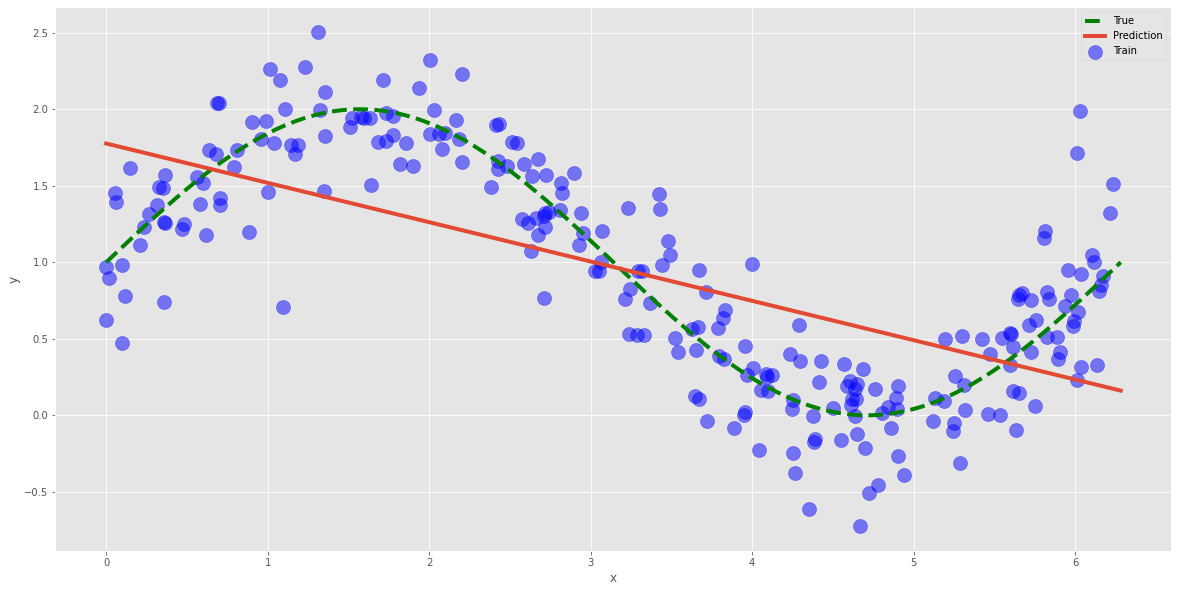

In [ ]:
data = generate_wave_set(1000, 250)
x_data = data['x_train'].reshape(-1, 1)
y_data = data['y_train'].reshape(-1, 1)

w, b = least_squares_method(x=x_data, y=y_data)
print(f'Train coefficients: w = {w[0]}, b = {b[0]}')

mse = mean_squared_error(y_pred=x_data * w + b, y_true=y_data)
print(f'Train MSE: {mse}')

mae = mean_absolute_error(y_pred=x_data * w + b, y_true=y_data)
print(f'Train MAE: {mae}')
plot(data)

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

1) Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 

2) Полином какой степени подходит больше других? Почему?

In [ ]:
class PolynomialRegression:
    def __init__(self, *, degree: int = 5):
        self.degree = degree
        self.x = None
        self.y = None
        self.w = None
        self.b = None

    def __calculate_coefficients(self) -> None:
        self.w = np.linalg.inv(self.x.T @ self.x) @ self.x.T @ self.y
        self.b = np.sum(self.y - self.x @ self.w)

    def __to_degree_matrix(self, x_array: np.ndarray) -> np.ndarray:
        matrix = []
        for x in x_array:
            matrix.append(np.array([x ** i for i in range(self.degree + 1)]))

        return np.array(matrix)

    def fit(self, *, x_train: np.ndarray, y_train: np.ndarray) -> None:
        self.x = self.__to_degree_matrix(x_train)
        self.y = y_train

    def predict(self, *, x_test: np.ndarray) -> np.ndarray:
        self.__calculate_coefficients()
        return self.__to_degree_matrix(x_test) @ self.w + self.b


def plot_data(*, prediction: np.ndarray, degree: int, error: float) -> None:
    plt.figure(figsize=(20, 10))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial regression with degree {degree}\nMSE = {error}')

    plt.plot(data['support'], data['values'], linestyle='dashed', label='True', color="green", linewidth=4)
    plt.scatter(data['x_train'], data['y_train'], label='Train', alpha=0.5, color="blue", s=200)
    plt.plot(data['support'], prediction, label='Prediction', linewidth=4)

    plt.legend()
    plt.show()

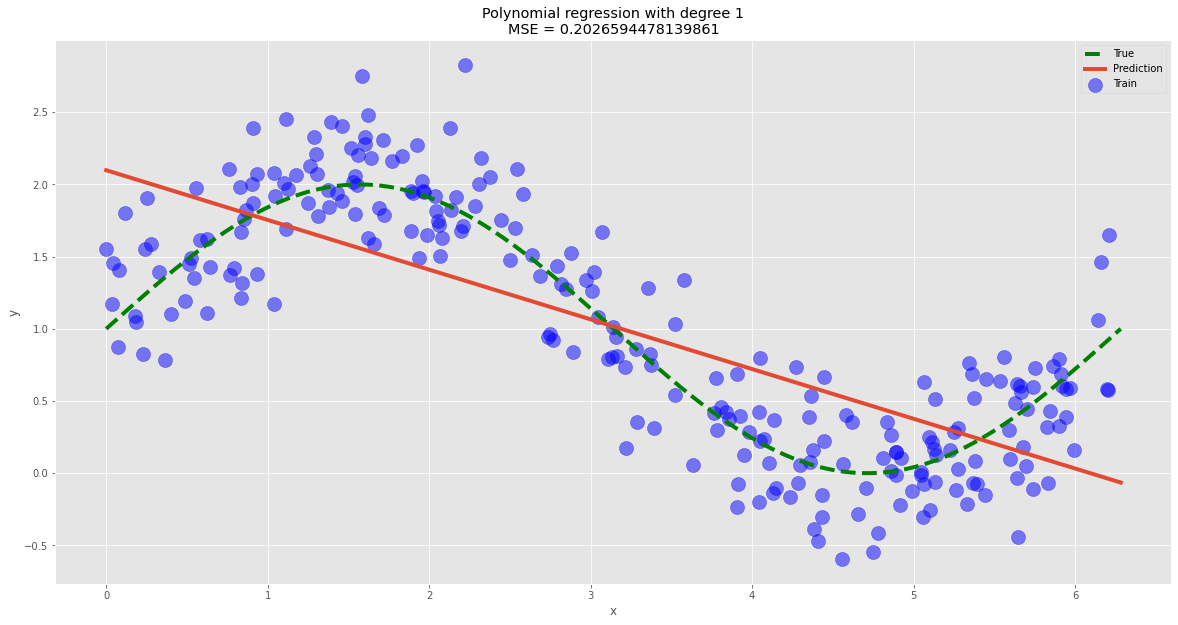

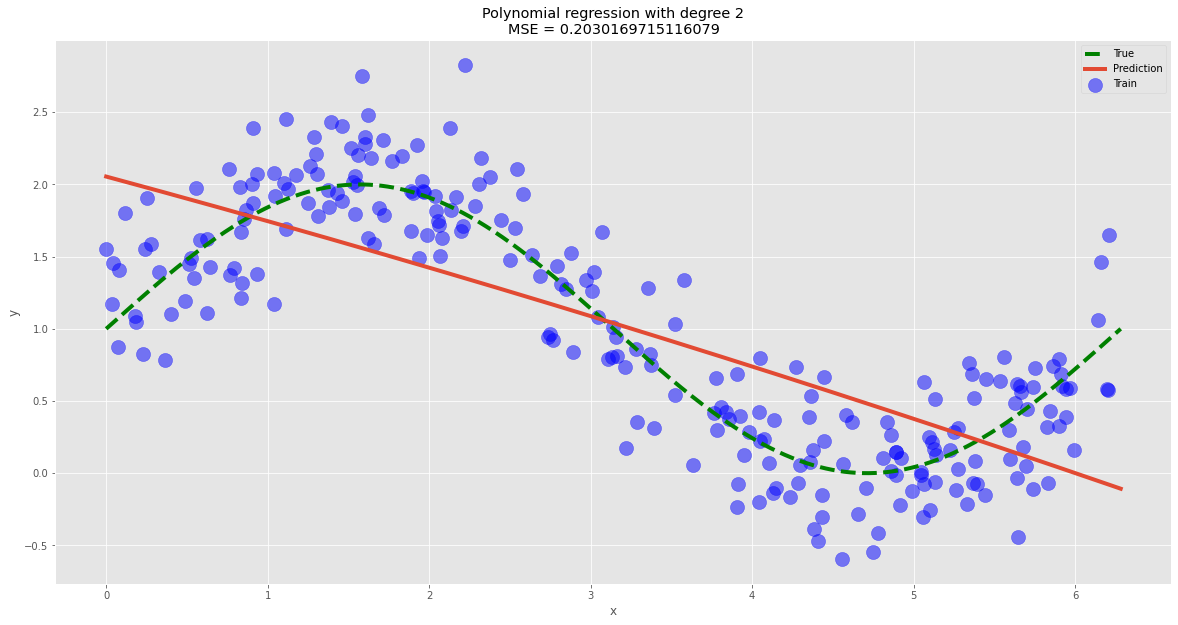

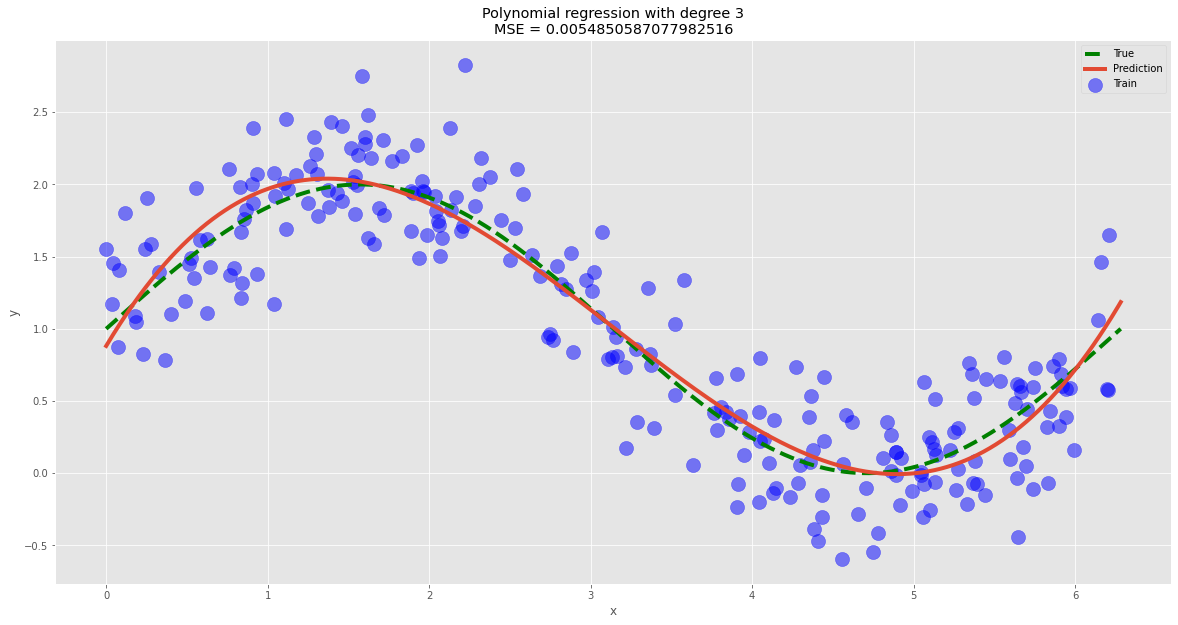

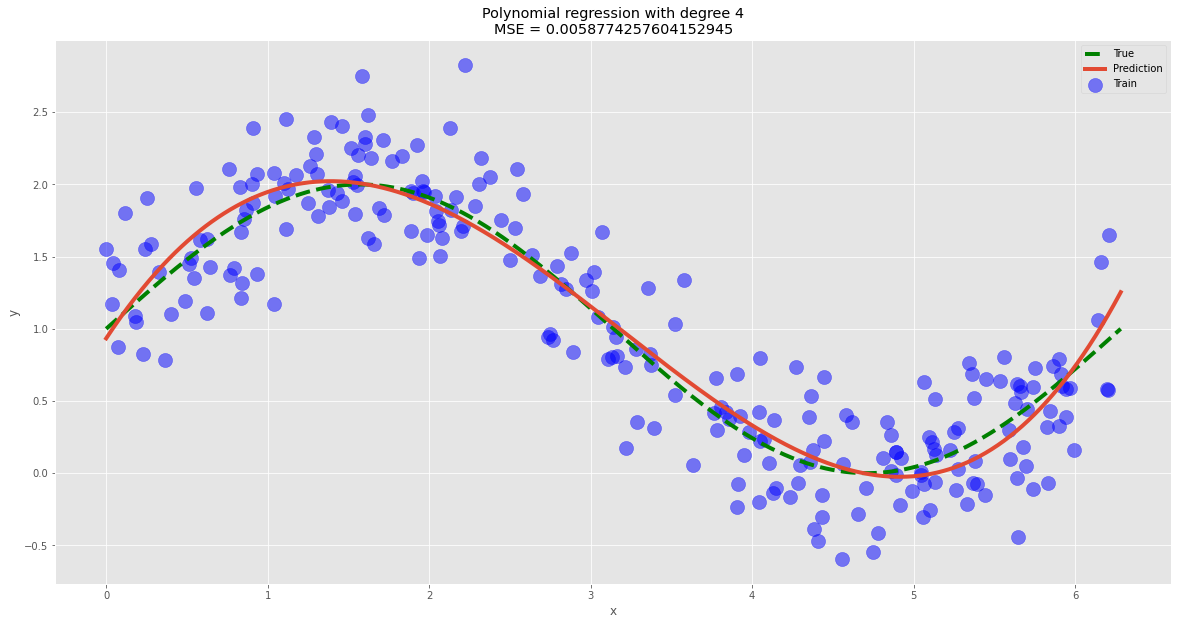

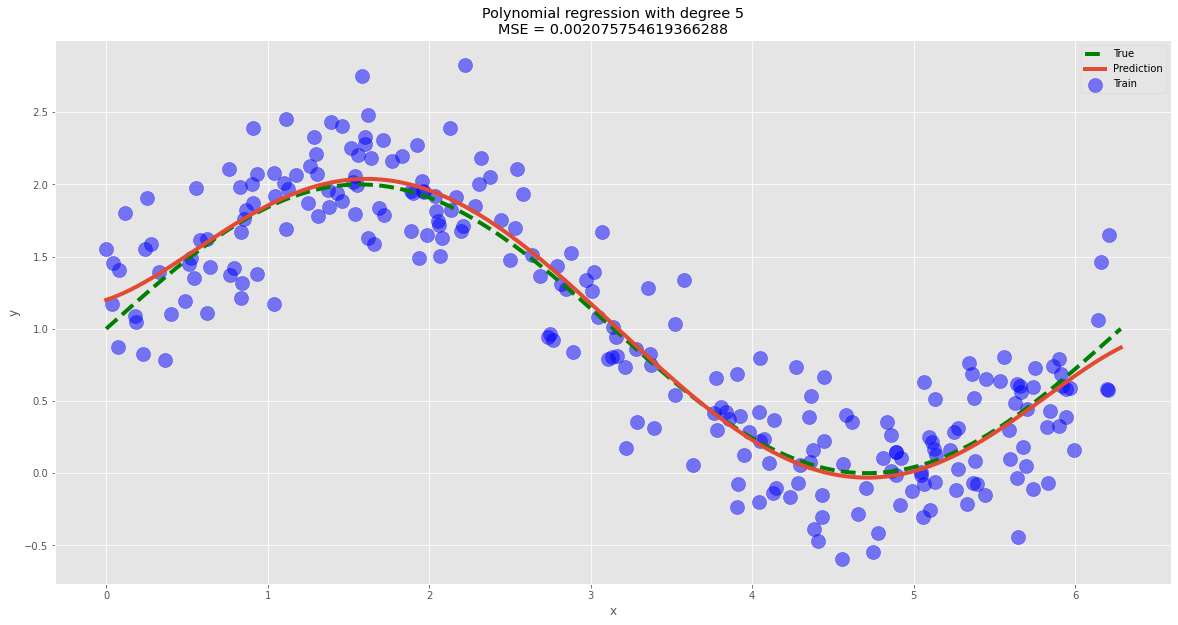

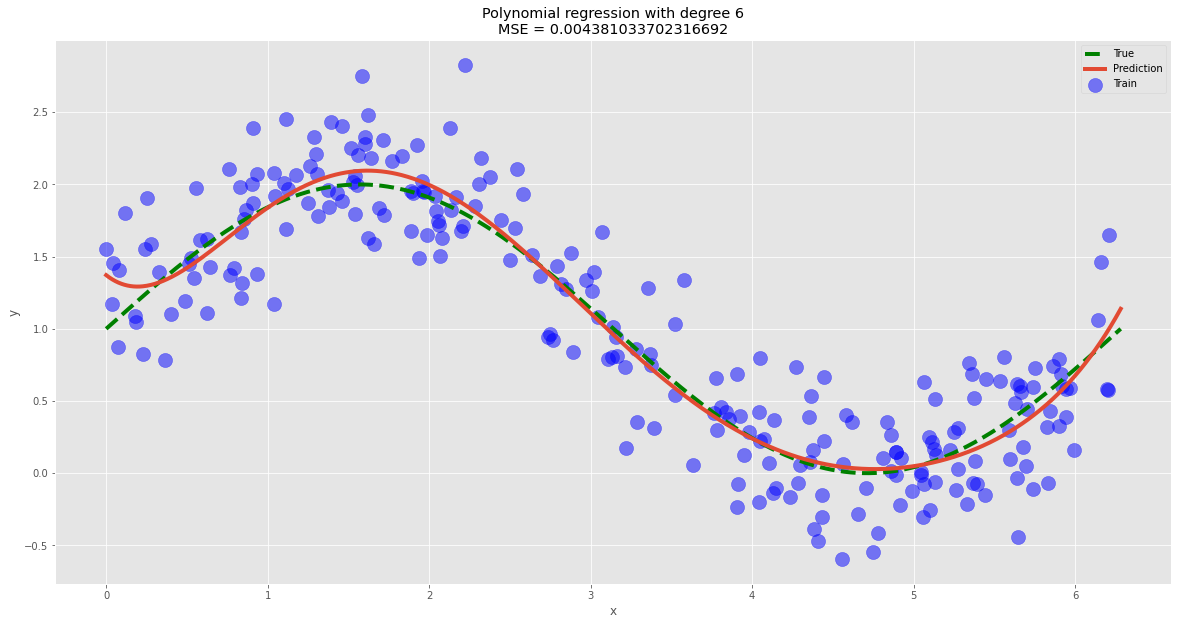

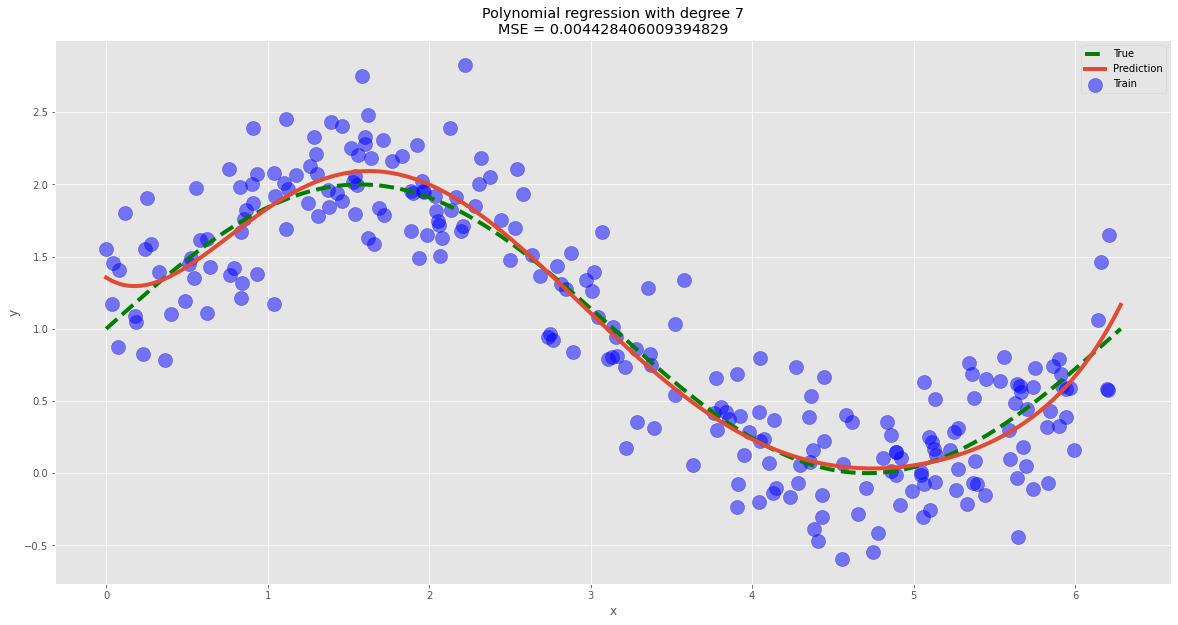

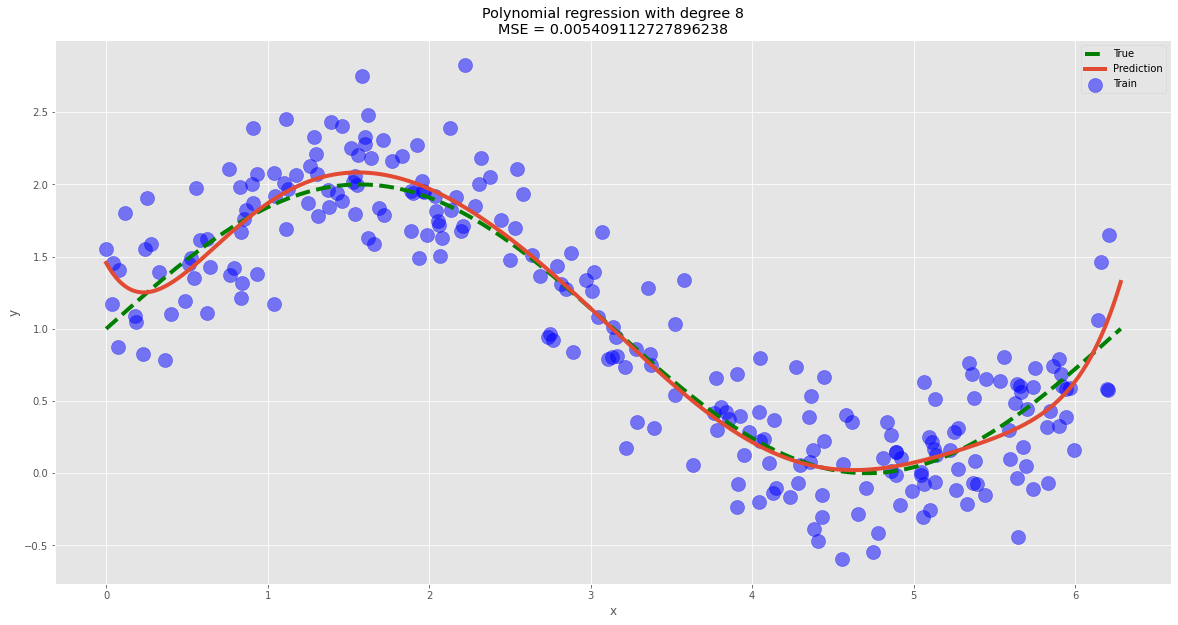

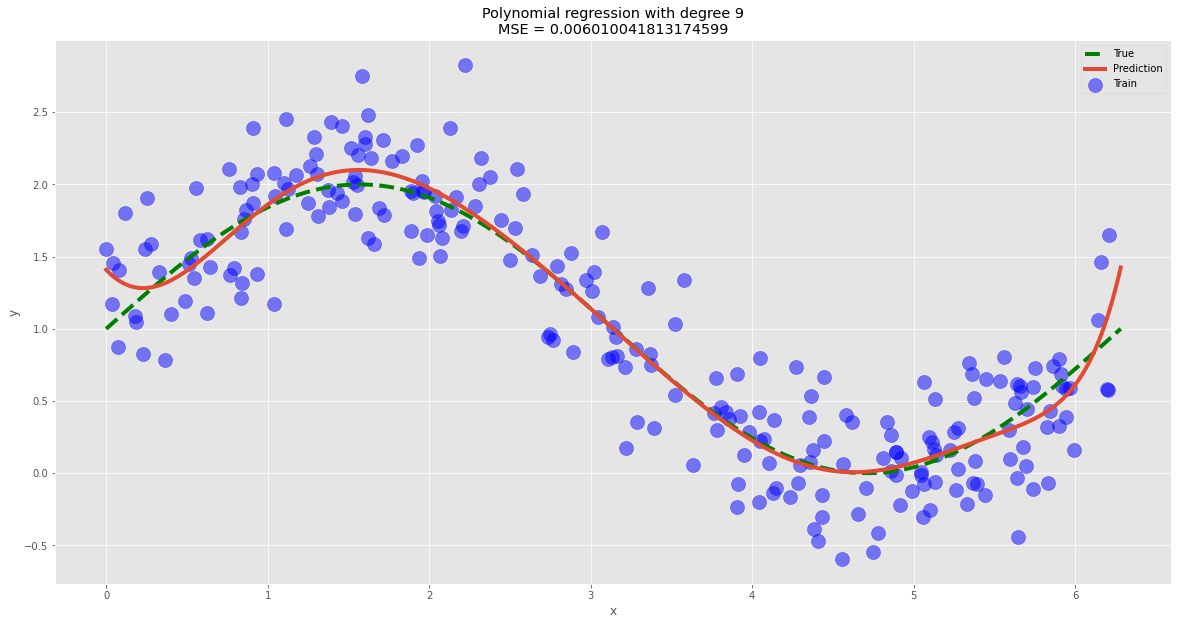

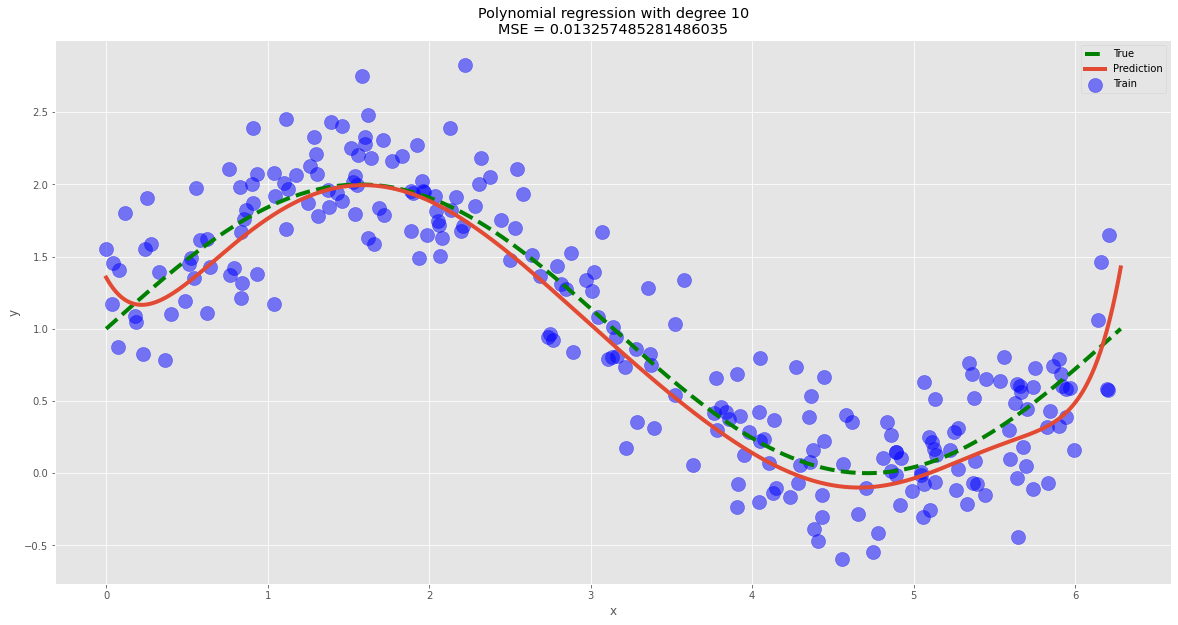



Best degree of polynomial: 5 - it has the least MSE: 0.002075754619366288


In [ ]:
data = generate_wave_set(1000, 250)
x_train = data['x_train']
y_train = data['y_train']
x_test = data['support']
y_test = data['values']

min_error = np.inf
min_error_index = -1
for degree in range(1, 11):
    pr = PolynomialRegression(degree=degree)
    pr.fit(x_train=x_train, y_train=y_train)
    y_pred = pr.predict(x_test=x_test)

    error = mean_squared_error(y_true=y_test, y_pred=y_pred)
    if error < min_error:
        min_error_index = degree
        min_error = error

    plot_data(prediction=y_pred, degree=degree, error=error)

print(f'\n\nBest degree of polynomial: {min_error_index} - it has the least MSE: {min_error}')

#### Результаты эксперимента
В данном эксперименте наиболее лучшую точность, если судить по среднеквадратичной ошибке, показывает полиномиальная регрессия степени 5, её и будем считать наилучшей.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
import pandas as pd
import warnings

from sklearn.datasets import load_boston

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
def load_and_organize_data() -> (pd.DataFrame, pd.DataFrame):
    boston = load_boston()
    x = pd.DataFrame(boston.data, columns=boston.feature_names)
    y = pd.DataFrame(boston.target, columns=['RATING'])
    return x, y


x, y = load_and_organize_data()
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

## Задание 3.4

1) Оставьте в наборе данных только 7 наиболее значимых признаков.

2) Настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_prediction(*, x: pd.DataFrame, y: pd.DataFrame):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    lin_regression = LinearRegression().fit(x_train, y_train)

    prediction_train = lin_regression.predict(x_train)
    prediction_test = lin_regression.predict(x_test)
    return y_train, prediction_train, y_test, prediction_test, lin_regression.coef_


def get_mse_mae(*, y_pred: pd.DataFrame, y_true: pd.DataFrame) -> (float, float):
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    return mse, mae


def get_top_features_list(*, x: pd.DataFrame, coefficients: np.ndarray, amount: int = 7) -> np.ndarray:
    feature_importance = pd.DataFrame(coefficients.T, index=x.columns, columns=['Importance'])
    feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
    return feature_importance.head(amount).index.to_numpy()


x, y = load_and_organize_data()
y_train, prediction_train, y_test, prediction_test, w = get_prediction(x=x, y=y)
mse_train, mae_train = get_mse_mae(y_pred=prediction_train, y_true=y_train)
mse_test, mae_test = get_mse_mae(y_pred=prediction_test, y_true=y_test)
print("Test result for whole dataset:")
print(f'MSE train: {mse_train}\nMAE train: {mae_train}\nMSE test: {mse_test}\nMAE test: {mae_test}')
print("-----------------------------------")

top_features = get_top_features_list(x=x, coefficients=w)
most_significant_x = x[top_features]
top_y_train, top_prediction_train, top_y_test, top_prediction_test, top_w = get_prediction(
    x=most_significant_x, y=y)

top_mse_train, top_mae_train = get_mse_mae(y_pred=top_prediction_train, y_true=top_y_train)
top_mse_test, top_mae_test = get_mse_mae(y_pred=top_prediction_test, y_true=top_y_test)
print("Test result for top 7 features:")
print(f'MSE train: {top_mse_train}\nMAE train: {top_mae_train}\nMSE test: {top_mse_test}\nMAE test: {top_mae_test}')

Test result for whole dataset:
MSE train: 21.710738460870058
MAE train: 3.2675373283290656
MSE test: 23.4626629004816
MAE test: 3.477283985828201
-----------------------------------
Test result for top 7 features:
MSE train: 38.836009998667556
MAE train: 4.210671358694555
MSE test: 15.344042211096895
MAE test: 2.8820034690542853


Из проведённого выше эксперимента видно, что значения метрик качества стали выше. Это связано с тем, что точность нашей модели во втором случае была снижена, в связи с ограничением количества критериев оценки до 7. Из плюсов второго опыта можно выделить возросшую скорость исполнения, т.к. наша модель стала значительно легче.